In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import matplotlib.dates as mdates
from sqlalchemy import create_engine
from config import username, password

engine = create_engine('postgresql://{}:{}@localhost:5432/cali_renewable_db'.format(username,password))
con = engine.connect()

sql_prod = '''Select * From  "Production".hourlyrenewable'''

full_data = pd.read_sql(sql=sql_prod,con=con)
full_data.head()

,timestamp,date,Hour,TOTAL,SOLAR TOTAL,SOLAR PV,SOLAR THERMAL,WIND TOTAL,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO
0,2015-06-01 00:00:00,2015-06-01,1,4669,0,0,0,2942,1038,321,209,159
1,2015-06-01 01:00:00,2015-06-01,2,4396,0,0,0,2708,1040,316,210,122
2,2015-06-01 02:00:00,2015-06-01,3,4197,0,0,0,2509,1039,319,209,121
3,2015-06-01 03:00:00,2015-06-01,4,4059,0,0,0,2372,1035,320,209,123
4,2015-06-01 04:00:00,2015-06-01,5,3694,0,0,0,1973,1035,317,208,161


In [5]:
full_data['date'] = pd.to_datetime(full_data['date'])

hour_grouped = full_data.groupby('Hour')
hour_sum = pd.DataFrame(hour_grouped['TOTAL'].mean())
#hour_sum['Solar'] = hour_sum['SOLAR']

hour_sum['Wind Total'] = hour_grouped['WIND TOTAL'].mean()
hour_sum['Biogas'] = hour_grouped['BIOGAS'].mean()
hour_sum['Geothermal'] = hour_grouped['GEOTHERMAL'].mean()
hour_sum['Solar PV'] = hour_grouped['SOLAR PV'].mean()
hour_sum['Solar Total'] = hour_grouped['SOLAR TOTAL'].mean()
hour_sum['Solar Thermal'] = hour_grouped['SOLAR THERMAL'].mean()
hour_sum['Small Hydro'] = hour_grouped['SMALL HYDRO'].mean()
hour_sum['Biomass'] = hour_grouped['BIOMASS'].mean()



display(full_data.head())
display(hour_sum.head())
print(full_data.info())

,timestamp,date,Hour,TOTAL,SOLAR TOTAL,SOLAR PV,SOLAR THERMAL,WIND TOTAL,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO
0,2015-06-01 00:00:00,2015-06-01,1,4669,0,0,0,2942,1038,321,209,159
1,2015-06-01 01:00:00,2015-06-01,2,4396,0,0,0,2708,1040,316,210,122
2,2015-06-01 02:00:00,2015-06-01,3,4197,0,0,0,2509,1039,319,209,121
3,2015-06-01 03:00:00,2015-06-01,4,4059,0,0,0,2372,1035,320,209,123
4,2015-06-01 04:00:00,2015-06-01,5,3694,0,0,0,1973,1035,317,208,161


,TOTAL,Wind Total,Biogas,Geothermal,Solar PV,Solar Total,Solar Thermal,Small Hydro,Biomass
Hour,,,,,,,,,
1,3786.868305,2026.159420,202.248267,968.937618,0.315690,0.417139,0.101449,311.474480,277.631380
2,3799.253938,2047.599244,202.647763,969.518589,0.302457,0.385633,0.083176,302.212980,276.889729
3,3719.287965,1973.146818,202.793321,969.470069,0.291115,0.306868,0.015753,295.821046,277.749842
4,3632.039067,1886.584751,202.828607,969.366100,0.229364,0.231254,0.001890,294.490233,278.538122
5,3538.490863,1783.758664,202.670447,968.717076,0.269691,0.277253,0.007561,303.310019,279.757404


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38088 entries, 0 to 38087
Data columns (total 12 columns):
timestamp        38088 non-null datetime64[ns]
date             38088 non-null datetime64[ns]
Hour             38088 non-null int64
TOTAL            38088 non-null int64
SOLAR TOTAL      38088 non-null int64
SOLAR PV         38088 non-null int64
SOLAR THERMAL    38088 non-null int64
WIND TOTAL       38088 non-null int64
GEOTHERMAL       38088 non-null int64
BIOMASS          38088 non-null int64
BIOGAS           38088 non-null int64
SMALL HYDRO      38088 non-null int64
dtypes: datetime64[ns](2), int64(10)
memory usage: 3.5 MB
None


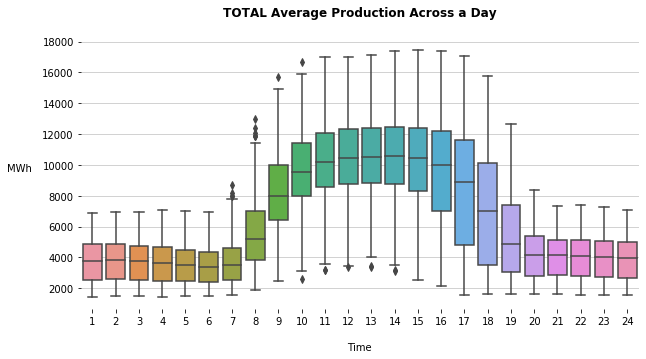

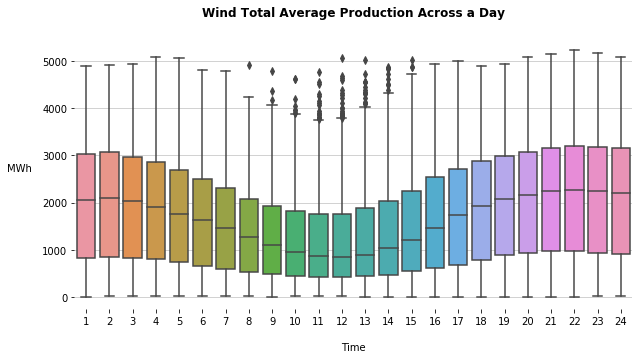

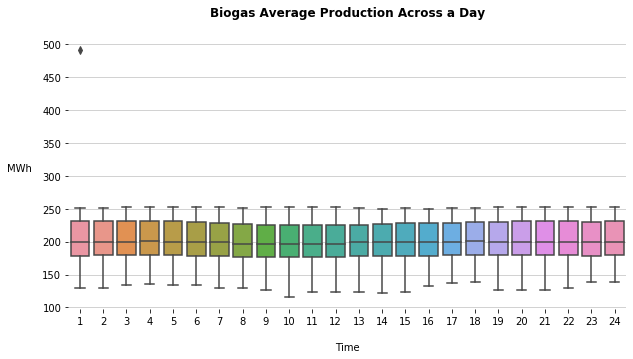

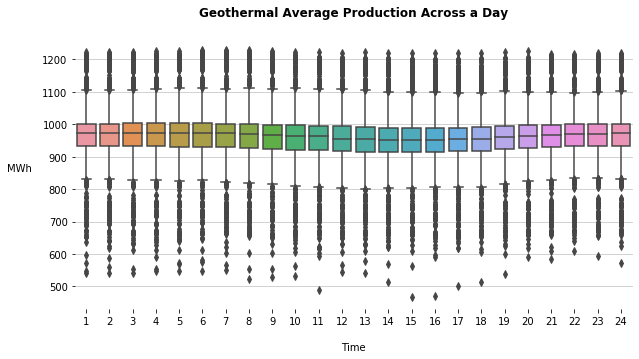

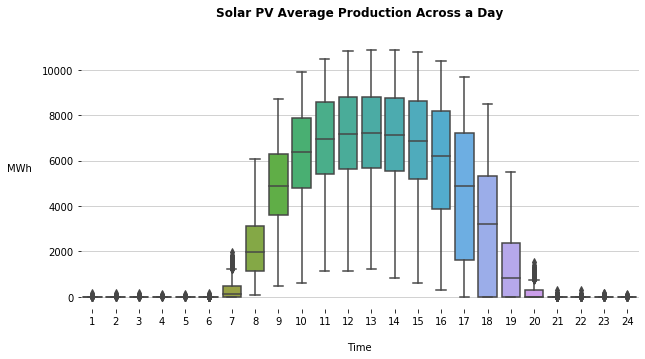

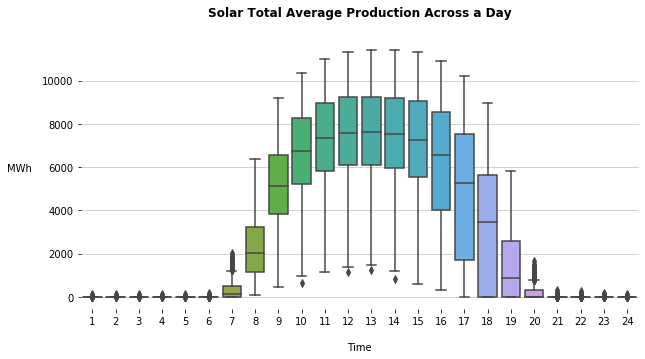

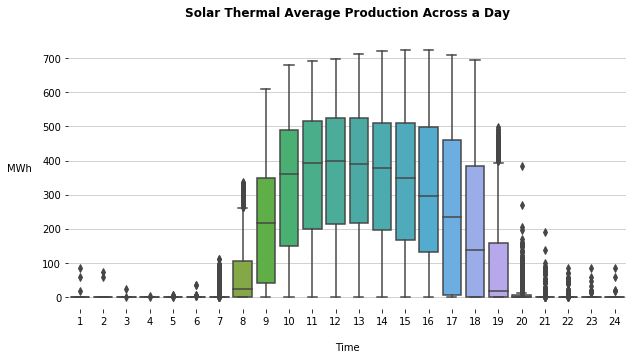

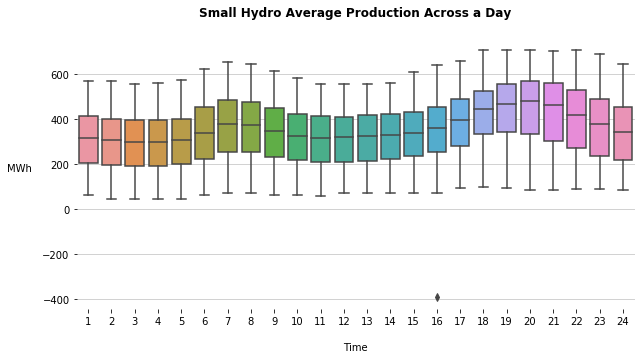

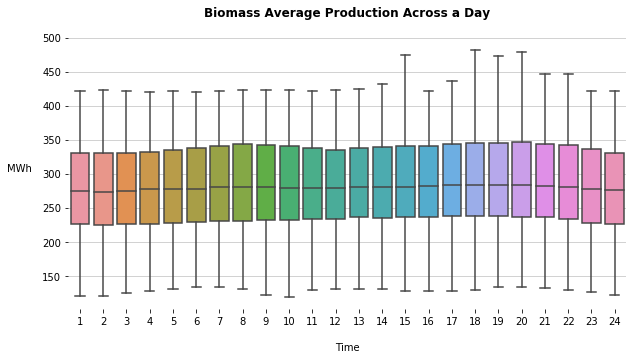

In [6]:
for i in range(len(hour_sum.columns)):
    plt.figure(figsize=(10,5))
    sns.boxplot(full_data['Hour'],full_data[hour_sum.columns[i].upper()])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().set_axisbelow(True)
    plt.gca().grid(axis='y',alpha=.7)

    plt.title('{} Average Production Across a Day\n'.format(hour_sum.columns[i]),fontweight='bold')

    plt.xlabel('\nTime')

    plt.ylabel("MWh  ",rotation='0',ha='right')
    
    plt.show()

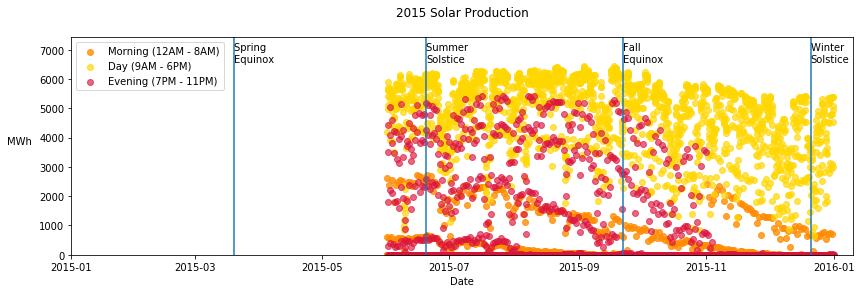

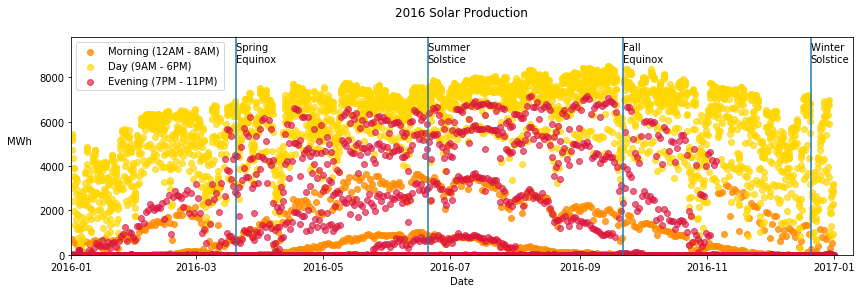

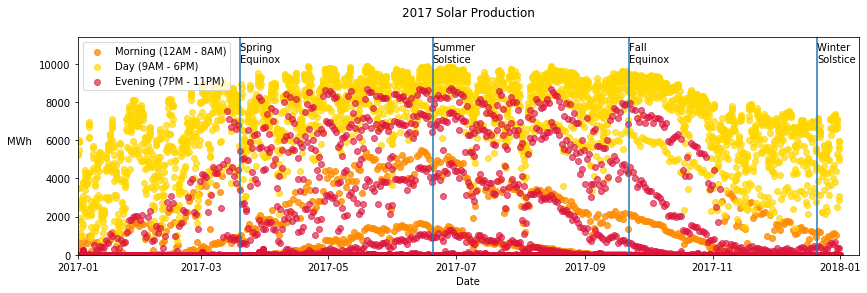

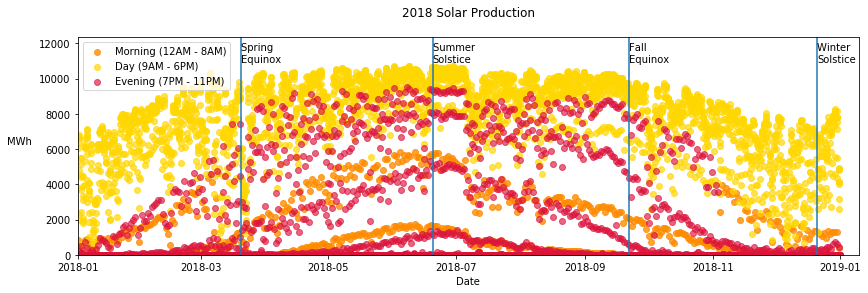

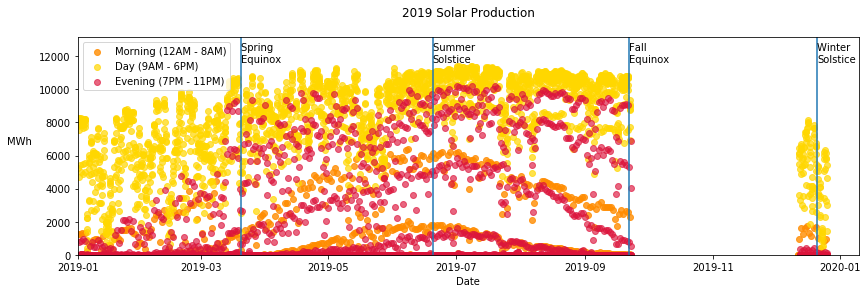

In [10]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

full_data['YEAR'] = full_data['date'].dt.year

for year in range(2015,2020):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    x = data['timestamp']
    y = data['SOLAR TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='#FF8C00',alpha=.8,label='Morning (12AM - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='#FFD700',alpha=.7,label='Day (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='#DC143C',alpha=.65,label='Evening (7PM - 11PM)')
    plt.ylim(0,y.max()*1.15)
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Solar Production\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.show()

<Figure size 1008x288 with 0 Axes>

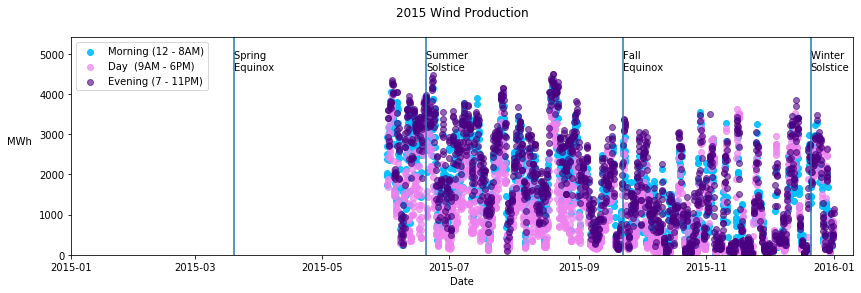

<Figure size 1008x288 with 0 Axes>

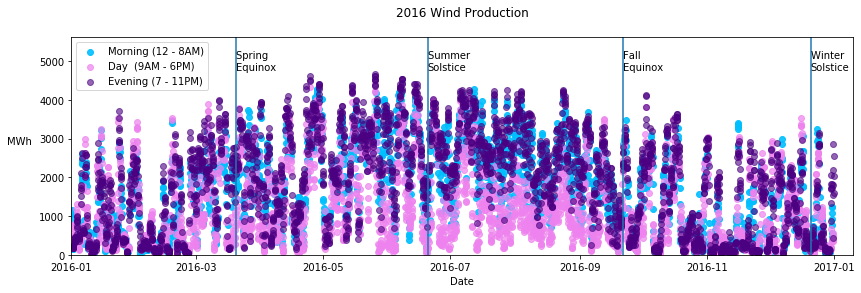

<Figure size 1008x288 with 0 Axes>

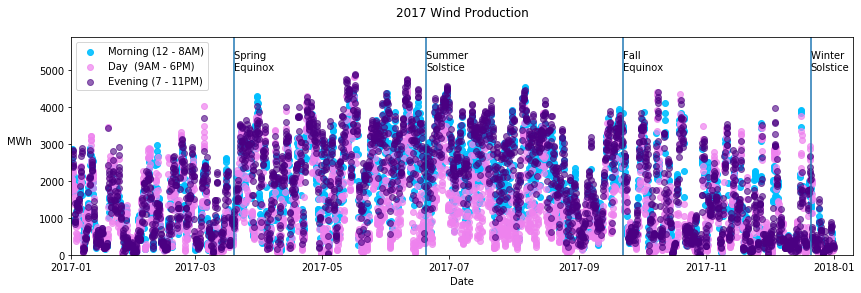

<Figure size 1008x288 with 0 Axes>

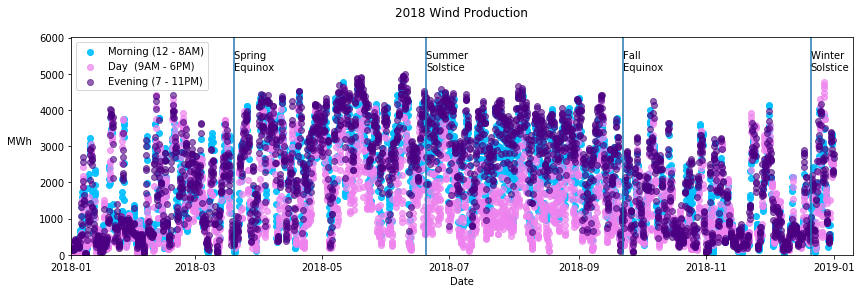

<Figure size 1008x288 with 0 Axes>

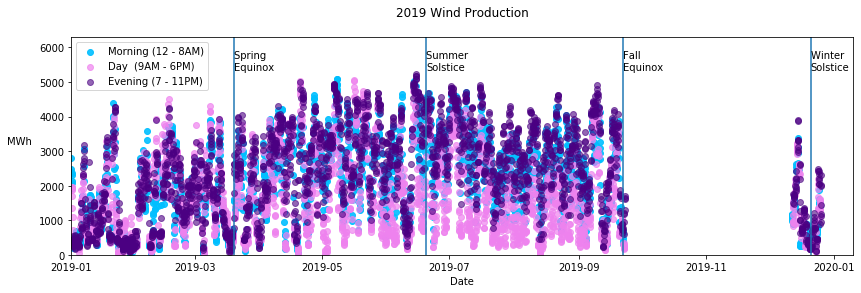

In [11]:
for year in range(2015,2020):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    mask_mid = ((hour >10)&(hour<16))
    masks = [mask_morning, mask_mid, mask_evening]
    plt.figure(figsize=(14,4))
    x = data['timestamp']
    y = data['WIND TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='#00BFFF',alpha=.9,label='Morning (12 - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='#EE82EE',alpha=.7,label='Day  (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='#4B0082',alpha=.6,label='Evening (7 - 11PM)') 
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylim(0,y.max()*1.2)
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Wind Production\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.show()

<Figure size 1008x288 with 0 Axes>

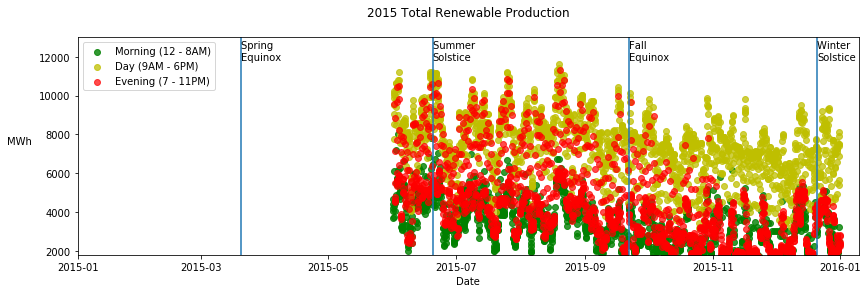

<Figure size 1008x288 with 0 Axes>

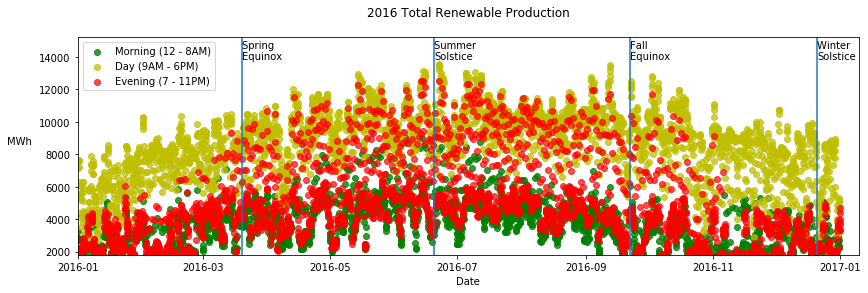

<Figure size 1008x288 with 0 Axes>

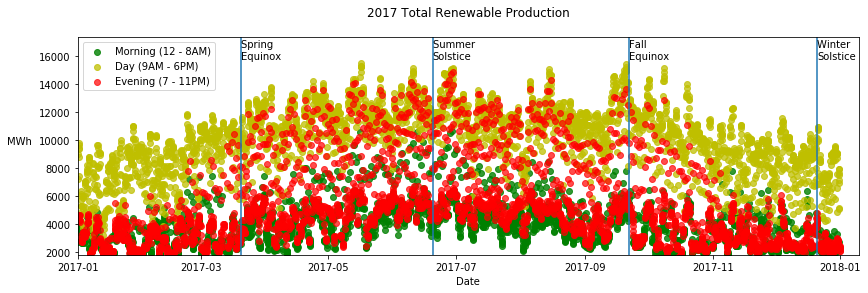

<Figure size 1008x288 with 0 Axes>

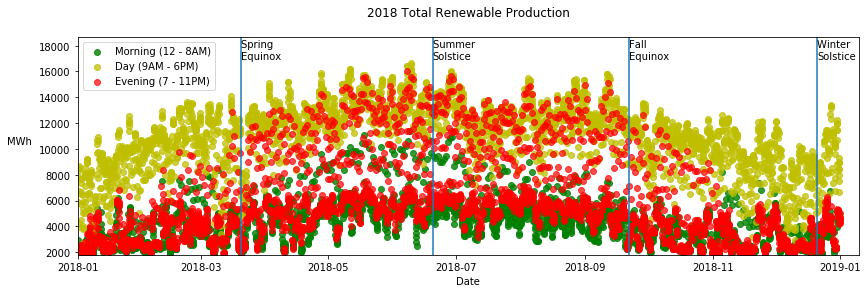

<Figure size 1008x288 with 0 Axes>

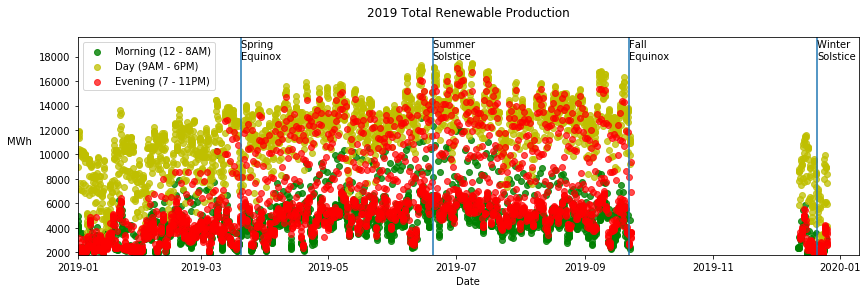

In [14]:
for year in range(2015,2020):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    mask_mid = ((hour >10)&(hour<16))
    plt.figure(figsize=(14,4))
    x = data['timestamp']
    y = data['TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='g',alpha=.8,label='Morning (12 - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='y',alpha=.75,label='Day (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='r',alpha=.7,label='Evening (7 - 11PM)')
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylim(1800,y.max()*1.12)
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Total Renewable Production\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.show()

In [18]:
sql_demand = 'Select * From "Demand".hourlydemand'
demand_data = pd.read_sql(sql=sql_demand, con=con)

demand_data['date'] = pd.to_datetime(demand_data['date'])
demand_data['YEAR'] = demand_data['date'].dt.year

demand_data.head()

,timestamp,date,Hour,DEMAND,YEAR
0,2019-12-26 10:00:00,2019-12-26,10,25158.0,2019
1,2019-12-26 09:00:00,2019-12-26,9,25454.0,2019
2,2019-12-26 08:00:00,2019-12-26,8,24774.0,2019
3,2019-12-26 07:00:00,2019-12-26,7,23493.0,2019
4,2019-12-26 06:00:00,2019-12-26,6,21718.0,2019


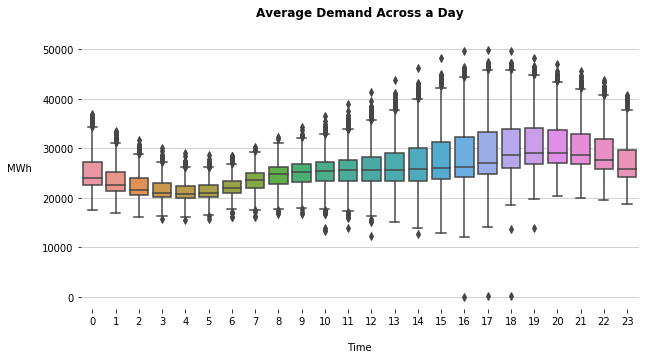

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(demand_data['Hour'],demand_data['DEMAND'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.gca().grid(axis='y',alpha=.7)

plt.title('Average Demand Across a Day\n',fontweight='bold')

plt.xlabel('\nTime')

plt.ylabel("MWh  ",rotation='0',ha='right')

plt.show()

<Figure size 1008x288 with 0 Axes>

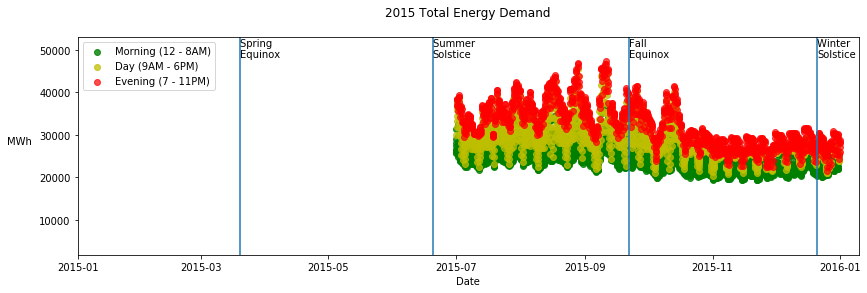

<Figure size 1008x288 with 0 Axes>

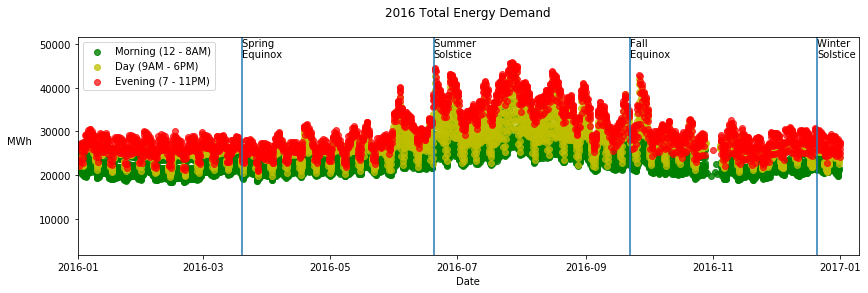

<Figure size 1008x288 with 0 Axes>

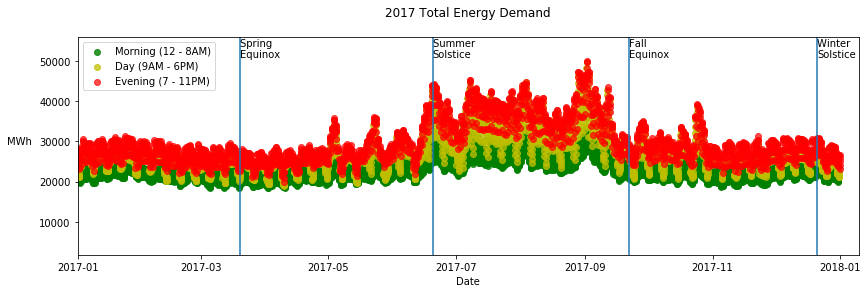

<Figure size 1008x288 with 0 Axes>

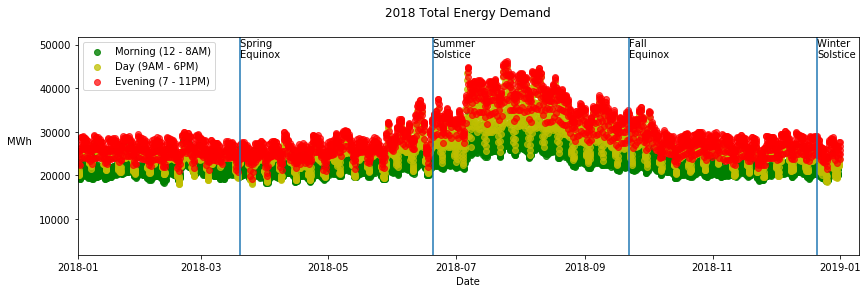

<Figure size 1008x288 with 0 Axes>

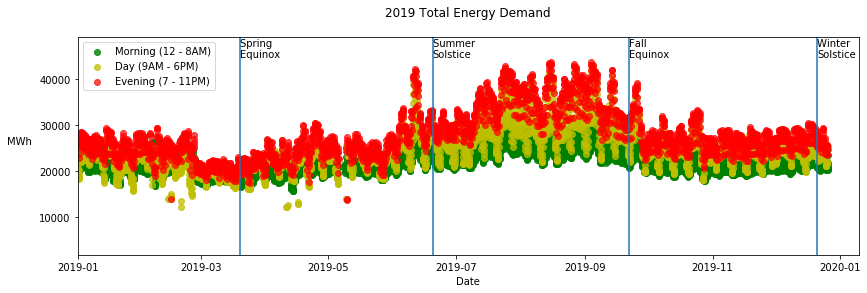

In [23]:
for year in range(2015,2020):
    data = demand_data.loc[demand_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    mask_mid = ((hour >10)&(hour<16))
    plt.figure(figsize=(14,4))
    x = data['timestamp']
    y = data['DEMAND']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='g',alpha=.8,label='Morning (12 - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='y',alpha=.75,label='Day (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='r',alpha=.7,label='Evening (7 - 11PM)')
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylim(1800,y.max()*1.12)
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Total Energy Demand\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.show()